In [1]:
# Import required packages
import numpy as np  # for mathematical operations, for arrays
import pandas as pd  # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting
import random  # For random number generator
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # To avoid warnings note while running the notebook
sns.set()

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = x_{i-1} - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

In [2]:
# Write your code here
def F(x):
    return (x+5)**2

def grad(x):
    return 2*(x+5)

x = random.random()
l_r = 0.01
thresh = 0.000001

x_old = x+1

while(abs(x-x_old)>thresh):
    x_old = x
    x = x - l_r*grad(x)

print("Minima of F(x) = ",x," ; F(",x,") = ",F(x),sep = "")


Minima of F(x) = -4.99995143390671 ; F(-4.99995143390671) = 2.3586654174597825e-09


# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
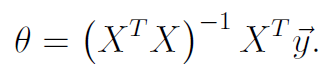


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
 <b>Implementation Note:</b>  Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [3]:
# Import X, y from "dataset1.csv"
# X and y are numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array

data = pd.read_csv("dataset1.csv")


X = data["X"].values.reshape(-1, 1)
y = data["y"].values


def computeParams(X_appended, y):
    X_inv = np.linalg.inv(np.matmul(X_appended.T, X_appended))

    theta = np.matmul(X_inv, np.dot(X_appended.T, y))
    return theta

### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

theta : 
 [17.78924731  4.90189099]


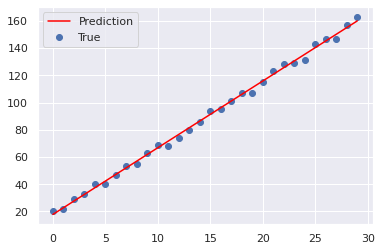

In [4]:
def predict(X, theta):
    """
    Predictions of X for a given theta.
    
    Parameters
    ----------
    X : array with size of (m x n)
    
    theta : array with size of (n+1, 1).
    
    Returns
    -------
    predictions : array of size (m x 1)
    
    """
    X_appended = np.hstack((np.ones(X.shape, dtype=X.dtype), X))
    prediction = np.matmul(X_appended, theta)

    return prediction


# Your predictions for the dataset1.csv

X_appended = np.hstack((np.ones(X.shape, dtype=X.dtype), X))
theta = computeParams(X_appended, y)
y_pred = np.matmul(X_appended, theta)

print("theta : \n", theta)
# plot a line Predictions Vs features and scatter plot for the training data X,y

plt.plot(X, y_pred, label="Prediction", c="red")
plt.scatter(X, y, label="True")
plt.legend()
plt.show()

# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

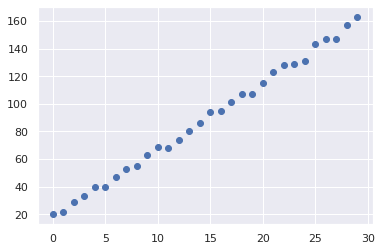

In [5]:
# Import the data from dataset1.csv - Same as Section 2
# Import X and y as numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array

data = pd.read_csv("dataset1.csv")


X = data["X"].values.reshape(-1, 1)
y = data["y"].values.reshape(-1, 1)
# Scatter Plot the data X and y for visualisation

plt.scatter(X, y)
plt.show()

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [6]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array with the shape of (m x n+1)
        where m is the number of examples,n is the number of features
        n+1 == n features + 1 for bias term(intercept as a feature)
    
    y : array with the shape of (m,1)
    
    theta : array with the shape of (n+1,1)
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # Write your code here

    J = np.sum((np.matmul(X, theta) - y) ** 2) / (2 * len(y))

    return J

## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [7]:
def gradientDescent(X_appended, y, theta, alpha, precision=0.001):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X_appended : array with shape of (m x n+1). Note : n+1 = n features + 1 intercept
    
    y : array with shape of (m, 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    precision : float, (One of the Stopping criteria). This is compared with the change in the cost from previous iter.
    
    Returns
    -------
    theta : array wih shape of (n+1,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    Count : Integer, Number of iterations taken to converge
    
    Cost : Float, Mean squared error at the end of the iteration
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Write your code here

    J_history = []

    flag = True
    m = len(y)
    J_old = computeCost(X_appended, y, theta) + 1
    J = computeCost(X_appended, y, theta)

    count = 0
    J_history.append(J)
    while abs(J - J_old) > precision:
        J_old = J
        theta = theta - alpha / m * np.sum(
            np.matmul(X_appended.T, (np.matmul(X_appended, theta) - y)), axis=1
        ).reshape(2, 1)
        J = computeCost(X_appended, y, theta)
        J_history.append(J)
        count += 1

    cost = computeCost(X_appended, y, theta)

    return theta, J_history, cost, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [8]:
# initialize fitting parameters with zeros
theta = np.zeros((2, 1))
# Play with these setting to see how these parameters play a huge role, for a decent converge use below parameters
precision = 0.000001
alpha = 0.001

##################################### Your Code here ########################################

X_appended = np.hstack((np.ones(X.shape, dtype=X.dtype), X))
theta, J_history, cost, count = gradientDescent(X_appended, y, theta, alpha, precision)

print("Cost :", cost, "\ntheta : \n", theta)

Cost : 2.424134514167511 
theta : 
 [[17.6687466 ]
 [ 4.90802378]]


## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

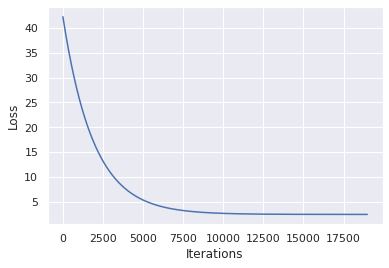

In [9]:
plt.plot(J_history[int(count * (0.001)) :])
plt.title("")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

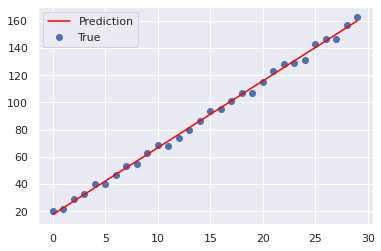

In [10]:
# plot a line for predictions and scatter plot for the training data X,y
plt.plot(X, np.matmul(X_appended, theta), label="Prediction", c="red")
plt.scatter(X, y, label="True")
plt.legend()
plt.show()

# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [11]:
theta = np.zeros((2, 1))
precision = 0.000001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [
    0.0001,
    0.0003,
    0.0005,
    0.0007,
    0.001,
    0.003,
    0.005,
    0.007,
    0.01,
    0.03,
    0.05,
    0.07,
    0.1,
    0.3,
]

# Write your code here
for alpha in alphas:
    X_appended = np.hstack((np.ones(X.shape, dtype=X.dtype), X))
    theta, J_history, cost, count = gradientDescent(
        X_appended, y, theta, alpha, precision
    )
    print("Alpha :", alpha, "Cost :", cost, "; Count :", count)

Alpha : 0.0001 Cost : 2.4413078221495095 ; Count : 146029
Alpha : 0.0003 Cost : 2.428586837399011 ; Count : 6988
Alpha : 0.0005 Cost : 2.4260423061304786 ; Count : 1950
Alpha : 0.0007 Cost : 2.424951382090273 ; Count : 918
Alpha : 0.001 Cost : 2.424133618070792 ; Count : 681
Alpha : 0.003 Cost : 2.4228621485056316 ; Count : 699
Alpha : 0.005 Cost : 2.4226079744829505 ; Count : 195
Alpha : 0.007 Cost : 2.422498808584202 ; Count : 92
Alpha : 0.01 Cost : 2.422450400650655 ; Count : 38
Alpha : 0.03 Cost : inf ; Count : 179
Alpha : 0.05 Cost : inf ; Count : 0
Alpha : 0.07 Cost : inf ; Count : 0
Alpha : 0.1 Cost : inf ; Count : 0
Alpha : 0.3 Cost : inf ; Count : 0


## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

**Write your answers in the following Markdown**

1. For a suitable value of alpha, the analytical and gradient descent approach gives practically the same solution. 


2. Analytical approach is preffered when the size of the data and the number of feautures are small, since the time taken for finding the analytical solution directly depends on the cube of the size of dataset, whereas the gradient descent takes approximately square of the dataset(although it depends on the convergence rate too). Thus when the size of input features and/or the dataset is large, gradient descent approach is preffered since the increase in cost as compared to analytical approach is not that high.


3. Yeah we can use some other cost function in place of MSE which denotes how far the predictions are from the true value. If we use a different cost function, we have to appropriately change the function used to find the distance of the step to take in gradient.


4. Initilisation of $\theta$ nearer to the solution reduces the time taken for convergence and initialising $\theta$ farther away from the solution increases time taken for convergence since it takes finite steps towards the solution and the number of steps reduce or increase depending on the distance of initialised $\theta$ from the solution.


5. One of the drawbacks of Gradient descent is the time it takes for convergence and also for choosing an proper learning rate for the gradient descent problem.


6. Increasing the number of features increases the time taken by both the gradient descent and analytical approach to arrive at an answer. Although the increase in the time taken by analytical approach is more as compared to gradient descent due to the fact discussed in question 2.


7. There is a sweet spot involved in choosing the learning rate. Taking too small a learning rate drastically increases the time required for the gradient descent model to arrive at minima and too large  a learning rate causes the loss to continuosly increase and will never converge to solution.